# **Big Data Analytics [CN7031] CRWK 2022-23**
# **Group ID: [Your Group ID]**
1.   Student 1: Sasindu Premarathne and U2348865
2.   Student 2: Koganti Tarun Chand and U2366409
3.   Student 3: Mohammed Akeel VELLATHAMBY ISMAIL and U2344592
4.   Student 4: Prahalad Venukonti and U2223805

---


If you want to add comments on your group work, please write it here for us:


# **Initiate and Configure Spark**

---


In [1]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 199 kB 47.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=cef569b961d839366e248c47b4c55a4c0b6c073df931c7a0ebd875fe1faff3b0
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
# Importing all the required libraries
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import math
import time

from pyspark.sql import SparkSession
from google.colab import drive
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import DecisionTreeClassifier, FMClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [3]:
# linking with SparkSession
spark = SparkSession.builder.master("local[*]").appName('62').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"


# **Load Data**

---


In [4]:
########## ONLY in Colab ##########
# mount your Google Drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Mounted at /content/drive


In [5]:
# Load Data from Colab:

########## ONLY in Colab ##########
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv")
########## ONLY in Colab ##########

In [ ]:
# Print DF to make sure it is working
IDS_df.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------------

In [6]:
# Casting all the data frame columns to float except Timestamp and Label Columns
temp_columns = IDS_df.columns
temp_columns.remove('Timestamp')
temp_columns.remove('Label')
IDS_df = IDS_df.select(*(col(c).cast("float").alias(c) for c in temp_columns), 'Timestamp', 'Label')

In [ ]:
# Verifying whether the required columns are casted to float or not
IDS_df.printSchema()

root
 |-- Dst Port: float (nullable = true)
 |-- Protocol: float (nullable = true)
 |-- Flow Duration: float (nullable = true)
 |-- Tot Fwd Pkts: float (nullable = true)
 |-- Tot Bwd Pkts: float (nullable = true)
 |-- TotLen Fwd Pkts: float (nullable = true)
 |-- TotLen Bwd Pkts: float (nullable = true)
 |-- Fwd Pkt Len Max: float (nullable = true)
 |-- Fwd Pkt Len Min: float (nullable = true)
 |-- Fwd Pkt Len Mean: float (nullable = true)
 |-- Fwd Pkt Len Std: float (nullable = true)
 |-- Bwd Pkt Len Max: float (nullable = true)
 |-- Bwd Pkt Len Min: float (nullable = true)
 |-- Bwd Pkt Len Mean: float (nullable = true)
 |-- Bwd Pkt Len Std: float (nullable = true)
 |-- Flow Byts/s: float (nullable = true)
 |-- Flow Pkts/s: float (nullable = true)
 |-- Flow IAT Mean: float (nullable = true)
 |-- Flow IAT Std: float (nullable = true)
 |-- Flow IAT Max: float (nullable = true)
 |-- Flow IAT Min: float (nullable = true)
 |-- Fwd IAT Tot: float (nullable = true)
 |-- Fwd IAT Mean: float (

In [7]:
# Dropping records with null values
IDS_df = IDS_df.na.drop()

In [ ]:
# The total number of attacks per label
IDS_df.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|5312835|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193354|
|      SSH-Bruteforce| 187589|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
+--------------------+-------+



In [8]:
IDS_df.createOrReplaceTempView("IDSView") # Create a View

In [ ]:
# Making sure that the View is Created
spark.sql("SELECT * FROM IDSView").show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------------

In [9]:
# Helper function to plot bar chart. Takes dictionary as an input and plots the dictionary keys on x-axis and dictionary values on y-axis
def bar_plot(result):
  plt.bar(range(len(result)), list(result.values()), align='center')
  plt.xticks(range(len(result)), list(result.keys()))
  plt.show()


# **Task 1: Spark SQL [30 marks]**

---



In [ ]:
# Student Name: Sasindu Premarathne and ID:U2348865
# Query 1 - Identify the available traffic types(Labels) and highlight them in a percentage format. For better visualization, I used seaborn ploting palform. Both Pie chart and Barplot is used for plotting the graphical representation.
#Futher, Total Forward Packets (Tot Fwd Pckts) and Total Backward Packets (Tot Bed Packts) are compared for the awareness of traffic packets being used.
#casting method is used to convert data type from String to Integer.

 #Assign entire records of the View to a variable


**Query 1  - Percentages of Types of Traffic** 

In [ ]:
NewID_df1 = spark.sql("SELECT Cast(sum(`Tot Fwd Pkts`) AS int) as TotFwdPkts,Cast(sum(`Tot Bwd Pkts`) AS int) as TotBwdPkts,Label, count(*) as ConnectionCount, count(*)* 100 / sum(count(*)) over () as Percentage_count from IDSView  GROUP BY  Label sort By ConnectionCount  desc" )
NewID_df1.show()

+----------+----------+--------------------+---------------+--------------------+
|TotFwdPkts|TotBwdPkts|               Label|ConnectionCount|    Percentage_count|
+----------+----------+--------------------+---------------+--------------------+
|  32674327|  39842432|              Benign|        5329908|   72.61437233532669|
|   1535774|    655000|    DDOS attack-HOIC|         686012|   9.346189614248903|
|   1028619|    111574|    DoS attacks-Hulk|         461912|  6.2930635864925675|
|    734211|    578882|                 Bot|         286191|   3.899050383800149|
|    193360|    193360|      FTP-BruteForce|         193360|  2.6343259648682062|
|   2199228|   2092235|      SSH-Bruteforce|         187589|   2.555702179476944|
|    139890|    139890|DoS attacks-SlowH...|         139890|  1.9058536368711902|
|    154774|     98976|DoS attacks-Golde...|          41508|  0.5655027004020972|
|     84242|     21076|DoS attacks-Slowl...|          10990|  0.1497271532576623|
| 203017972|    




**Graphical representation**

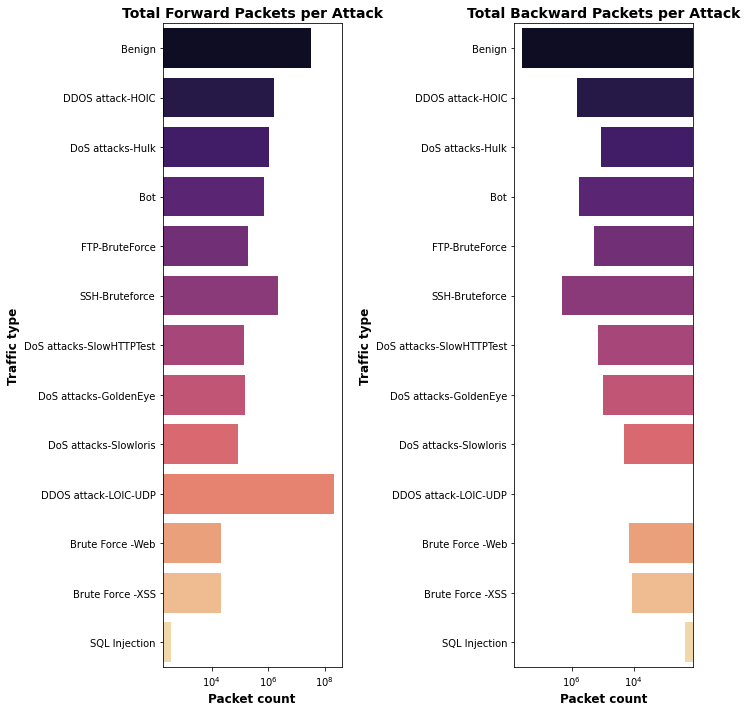

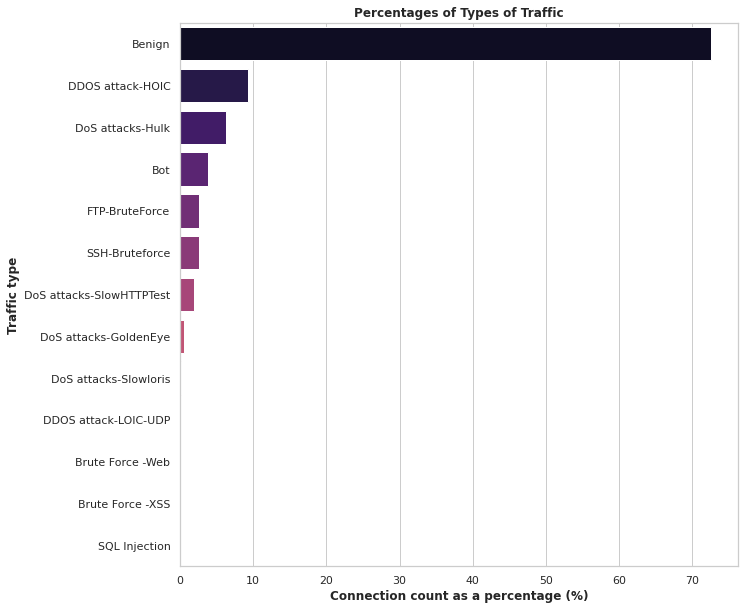

In [ ]:
ndf1= NewID_df1.toPandas()
fig=plt.figure(figsize=(10, 10))#set Figure Plot area size
ax0=fig.add_subplot(1,2,1)# Create subplot with rows, columns and indexing
ax1=fig.add_subplot(1,2,2)

#subplot 1 - Total Forward Packets per Attack
ax0 = sns.barplot(y='Label', x= ndf1['TotFwdPkts'],data=ndf1, alpha=1.0,palette = 'magma',log=1,ax=ax0)
ax0.set_title('Total Forward Packets per Attack', weight='bold').set_fontsize('14')
ax0.set_xlabel('Packet count', weight='bold').set_fontsize('12')
ax0.set_ylabel('Traffic type', weight='bold').set_fontsize('12')
fig.tight_layout()


#subplot 2 - Total Backward Packets per Attack
ax1 = sns.barplot(y='Label', x= ndf1['TotBwdPkts'],data=ndf1, alpha=1.0,palette = 'magma',log=1,ax=ax1)
ax1.set_title('Total Backward Packets per Attack' , weight='bold').set_fontsize('14')
ax1.set_xlabel('Packet count', weight='bold').set_fontsize('12')
ax1.set_ylabel('Traffic type', weight='bold').set_fontsize('12')
ax1.invert_xaxis()
fig.tight_layout()
plt.show()
####################################
#Bar Plot for Percentages of Types of Traffic
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
value=ndf1['Percentage_count']
g3 = sns.barplot(y='Label', x= value, data=ndf1, alpha=1.0,palette = 'magma' )
g3.set_title('Percentages of Types of Traffic',weight='bold')
g3.set_xlabel('Connection count as a percentage (%)',weight='bold')
g3.set_ylabel('Traffic type',weight='bold')
fig.tight_layout()
plt.show()



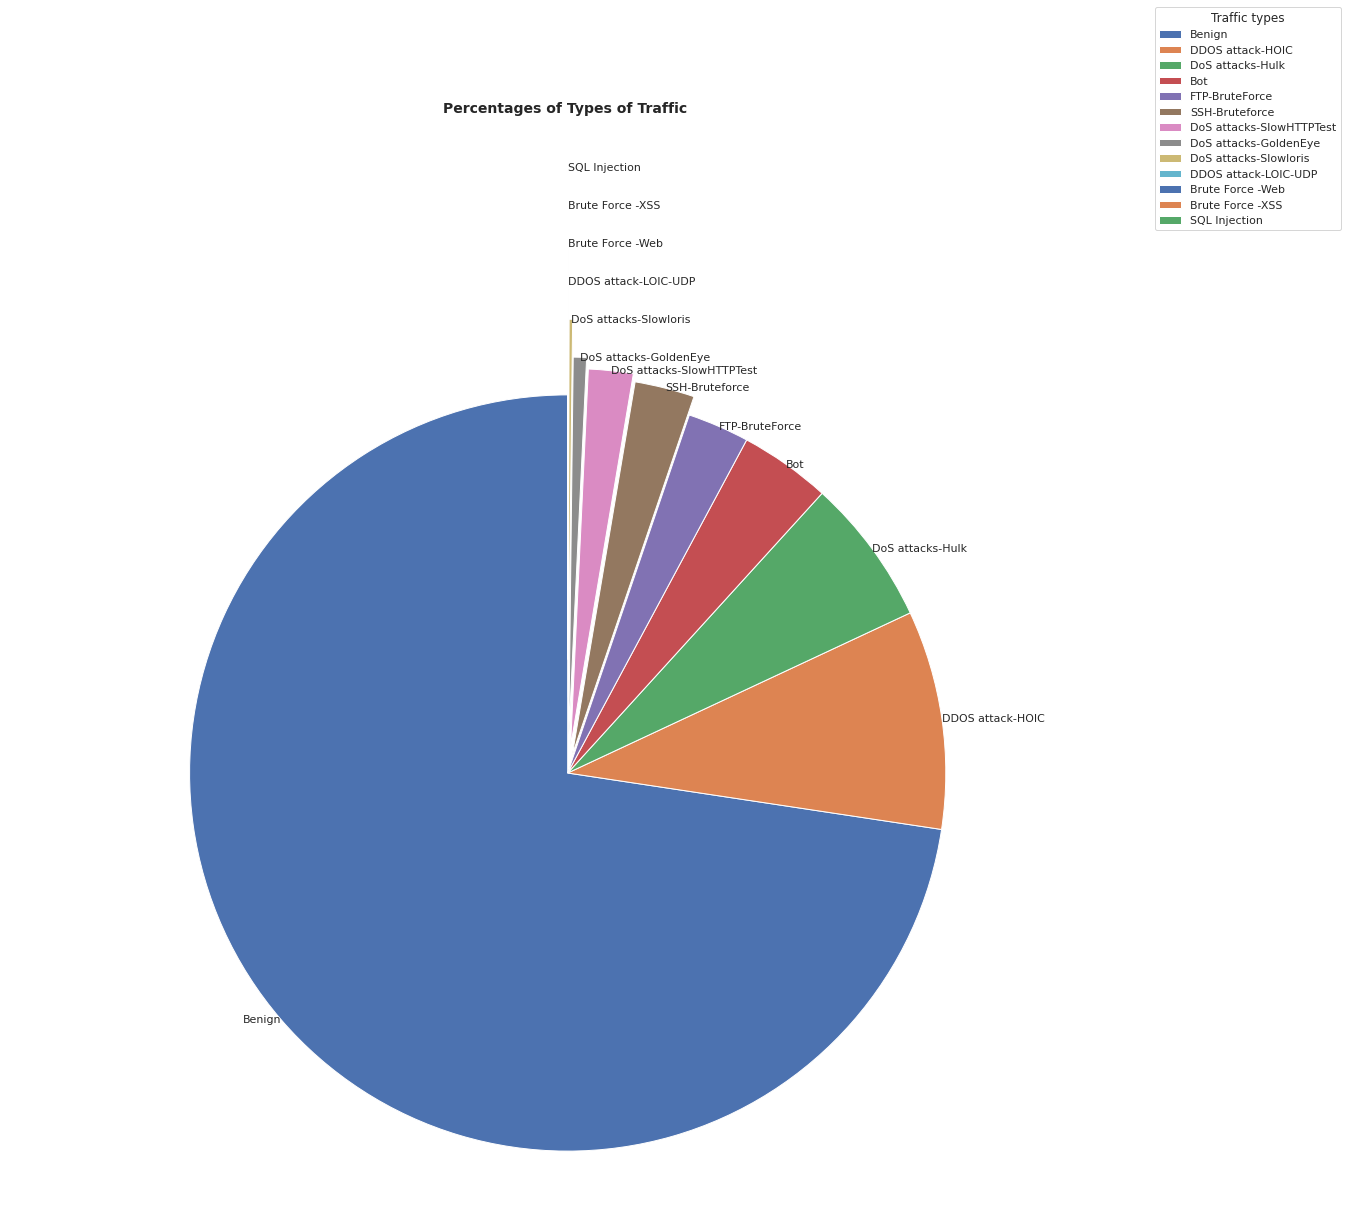

In [ ]:
#Pie Plot -  Percentages of Types of Traffic

ndf1= NewID_df1.toPandas()
plt.figure(figsize=(20,20)) 
labels = ndf1['Label']
sizes = ndf1['Percentage_count']
explode=[0,0,0,0,0,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6]
plt.pie(sizes,labels=labels, explode=explode,startangle=90,labeldistance=1)
plt.legend(title="Traffic types" ,bbox_to_anchor=(1.2,1), loc="right")
plt.title('Percentages of Types of Traffic', weight='bold').set_fontsize('14')
plt.axis('equal') # Set aspect ratio to be equal so that pie is  drawn as a circle.
plt.show()
################################################################################



**Query 2 - Most Vulnerable Well known Ports**



In [ ]:
# Student Name:Sasindu Premarathne  and ID:U2348865
# Query 2 - Highlight the most Vulnerable Well known Ports under attack
#All traffic is initially categorized as NO Attack or Under Attack, by using Case method.
#I am selecting the Destination Port (Column "DST Port")  and filter the Well Known Ports from the dataframe.
#Identify the well known ports which are marked as "Under Attack", which are vulnerable. and ORDER BY descending order.
#I will be plotting the output in a bar chart using  simple plotting


PortID_df = spark.sql("SELECT  `DST Port`,sum(`Tot Fwd Pkts`), CASE 'Label' WHEN 'Benign' THEN 'NO Attack'  ELSE 'Under Attack' END AS State, count(*)as Frequency  FROM IDSView GROUP BY `DST Port` HAVING `Dst Port` > 0 and `Dst Port`< 1024 ORDER BY 4 desc")
PortID_df.show()



+--------+-----------------+------------+---------+
|DST Port|sum(Tot Fwd Pkts)|       State|Frequency|
+--------+-----------------+------------+---------+
|    80.0|     2.11027199E8|Under Attack|  1993123|
|    53.0|        1544105.0|Under Attack|  1294710|
|   443.0|      1.1665741E7|Under Attack|   609184|
|    21.0|         333802.0|Under Attack|   333440|
|   445.0|        1168226.0|Under Attack|   245479|
|    22.0|        2210713.0|Under Attack|   190006|
|   137.0|          65234.0|Under Attack|    13584|
|    67.0|           4284.0|Under Attack|     4270|
|   138.0|           6659.0|Under Attack|     2986|
|   500.0|          16140.0|Under Attack|     2718|
|    23.0|           3253.0|Under Attack|     1439|
|   135.0|           5933.0|Under Attack|     1368|
|   123.0|           1083.0|Under Attack|      971|
|   139.0|           2179.0|Under Attack|      957|
|    81.0|            120.0|Under Attack|       61|
|    25.0|             64.0|Under Attack|       23|
|   213.0|  

**Graphical Representation**

Text(0, 0.5, ' Attack Hits')

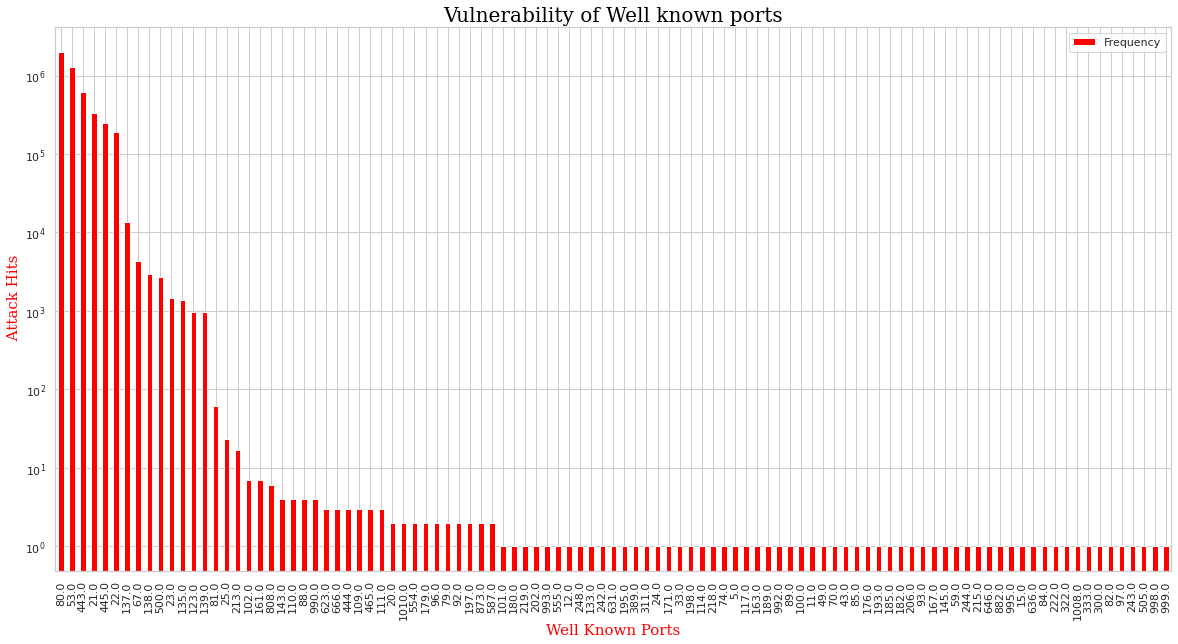

In [ ]:
pandas_df = PortID_df.toPandas()

pandas_df.plot(x='DST Port', y='Frequency', kind='bar', logy=True ,figsize=(20,10) ,facecolor='red' )

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'red','size':15}

plt.title("Vulnerability of Well known ports" , fontdict=font1)
plt.xlabel("Well Known Ports" , fontdict=font2)
plt.ylabel(" Attack Hits" , fontdict=font2)

In [ ]:
# Student 2 name and ID Koganti Tarun Chand and U2366409
# Query 1 [Briefly explain]:
'''
  To find out the Maximum flow duration , Average Flow Bytes and the Set of Labels which are not Benign between the time period
  10:50:04 to 10:50:10 grouped by their time and sorted as per the maximum flow duration 
'''

# Extracts only the time from the Timestamp. Ex:- Input : 14/02/2018 08:31:01 ==>  Output: 08:31:01
def extract_time(str):
    return str.split()[1]

# For comparing whether the time is inbetween the given low and high values
def in_between(low, value, high):
  return ((low <= value) and (value <= high))

# Function for checking if an attack set contains only Benign attack
def only_benign(attacks):
  if (len(attacks) == 1) and (attacks[0].lower() == 'benign'):
    return True
  return False

# Registering the above 3 functions as user defined functions to use them in SQL
spark.udf.register("extractTimeUDF", extract_time, StringType())
spark.udf.register("inBetweenUDF", in_between, BooleanType())
spark.udf.register("onlyBenignUDF", only_benign, BooleanType())

sqlDF = spark.sql("SELECT extractTimeUDF(Timestamp) as Time, INT(MAX(`Flow Duration`)) as MaxFlowDuration, AVG(`Flow Byts/s`) as AvgFlowBytes, collect_set(Label) as LabelList from IDSView where inBetweenUDF('10:50:04', extractTimeUDF(Timestamp), '10:50:10') = true group by extractTimeUDF(Timestamp) having onlyBenignUDF(LabelList)=false and AvgFlowBytes!='NaN' order by 2 DESC") 
sqlDF.show(truncate=False)

+--------+---------------+------------------+-------------------------------------------------------+
|Time    |MaxFlowDuration|AvgFlowBytes      |LabelList                                              |
+--------+---------------+------------------+-------------------------------------------------------+
|10:50:10|119999296      |58453.05464477014 |[FTP-BruteForce, Benign, Bot, DoS attacks-SlowHTTPTest]|
|10:50:06|119698992      |763290.9298921014 |[FTP-BruteForce, Benign, Bot, DoS attacks-SlowHTTPTest]|
|10:50:07|119663144      |53989.44168716166 |[FTP-BruteForce, Benign, Bot, DoS attacks-SlowHTTPTest]|
|10:50:08|119636208      |118569.96397342968|[FTP-BruteForce, Benign, Bot, DoS attacks-SlowHTTPTest]|
|10:50:05|119164672      |49598.568752208506|[FTP-BruteForce, Benign, Bot, DoS attacks-SlowHTTPTest]|
|10:50:09|118620120      |47913.581881621   |[FTP-BruteForce, Benign, Bot, DoS attacks-SlowHTTPTest]|
|10:50:04|117653232      |247943.94932664302|[FTP-BruteForce, Benign, Bot, DoS att

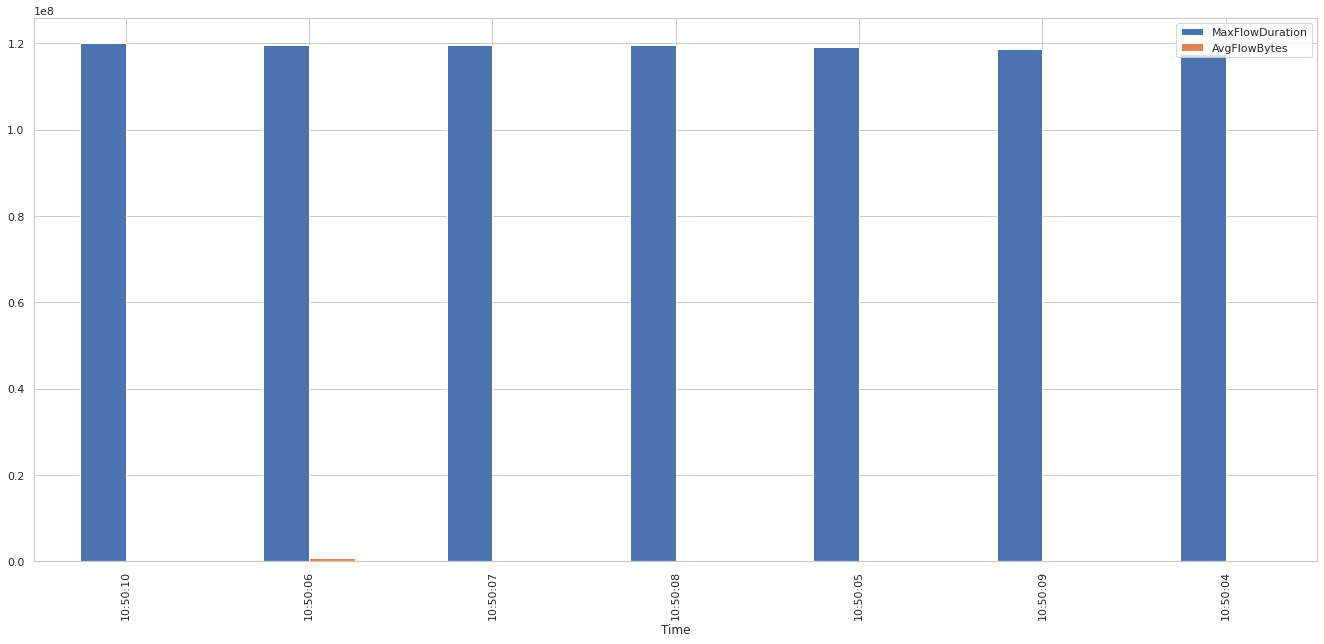

In [ ]:
sqlDF.toPandas().plot(x = 'Time', y= ['MaxFlowDuration', 'AvgFlowBytes'], kind = 'bar', figsize=(23, 10))

In [ ]:
# Student 2 name and ID Koganti Tarun Chand and U2366409
# Query 2 [Briefly explain]:
'''
 Find the average of Flow Duration grouped by their Destination Ports less than 100 between all the two records having same total forward and total backward packets and same timestamps and also between 
 the two records having same forward header length and backward header length packets and same timestamps
'''
sqlDF = spark.sql("select INT(DstPort), AVG(FlowDuration) from (select a.`Dst Port` as DstPort, a.`Flow Duration` as FlowDuration from IDSView a INNER JOIN IDSView b ON a.`Tot Fwd Pkts` = b.`Tot Bwd Pkts` where a.Timestamp = b.Timestamp union select a.`Dst Port` as DstPort, a.`Flow Duration` as FlowDuration from IDSView a INNER JOIN IDSView b ON a.`Fwd Header Len` = b.`Bwd Header Len` where a.Timestamp = b.Timestamp) group by DstPort having DstPort<100 order by DstPort asc")
sqlDF.show()

+-------+--------------------+
|DstPort|   avg(FlowDuration)|
+-------+--------------------+
|      0|-1.38641505881295...|
|     15|                20.0|
|     20|             80979.0|
|     21|   4374240.631578947|
|     22|  505796.20899699966|
|     23| 1.961115457017544E7|
|     24|            593227.0|
|     25|   7081276.285714285|
|     43|            229306.0|
|     49|            208965.0|
|     53|  1035170.1197357285|
|     59|            661455.0|
|     67|  25876.906336088156|
|     70|                18.0|
|     79|                20.0|
|     80| 2.424537768643356E7|
|     81|  1133331.5882352942|
|     84|           7016309.0|
|     88|  17.333333333333332|
|     89|            621936.0|
+-------+--------------------+
only showing top 20 rows



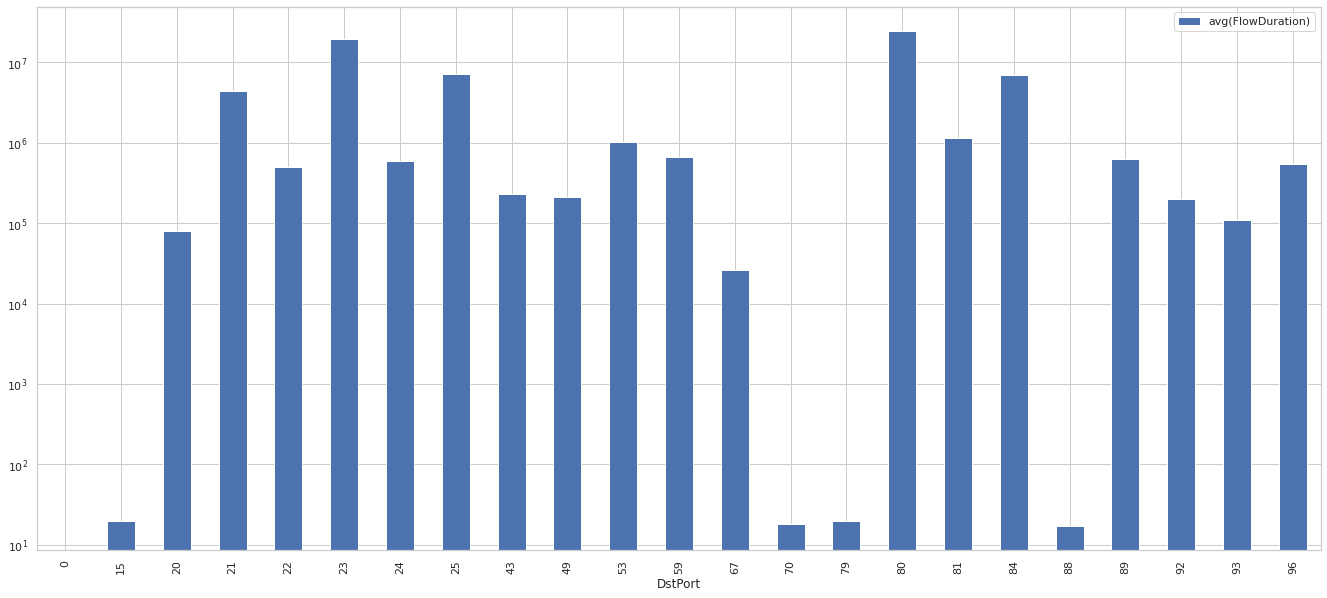

In [ ]:
sqlDF.toPandas().plot(x = 'DstPort', y = 'avg(FlowDuration)', kind='bar', logy=True, figsize=(23, 10))

In [11]:
# Student 3 name and ID Mohammed Akeel VELLATHAMBY ISMAIL and U2344592
# Query 1 [Briefly explain]:
'''
  Get the total DST Port counts from the dataset and find how many Benign label count and Non Benign label counts are there between the port 1 to 100 and 
  group by the port in ascending order (Benign Label Count + NON Benign Label Count = Total Port Counts)

'''
sqlDF = spark.sql("select Table3.DstPort, TotalDstPortCount, Benign_Count,NOTBenignCount from(select Table1.DstPort, TotalDstPortCount, Benign_Count from (Select `Dst Port` as DstPort, count(`Dst port`) as TotalDstPortCount from IDSView group by `Dst Port`) as Table1 Inner join (Select `Dst Port` as DstPort, count(*) as Benign_Count from IDSView where Label='Benign' group by `Dst Port`) as Table2 ON Table1.DstPort=Table2.DstPort ) as Table3 Inner Join (Select `Dst Port` as DstPort,count(*) as NOTBenignCount from IDSView where Label!='Benign' group by `Dst Port`) as Table4 on Table4.DstPort=Table3.DstPort where Table4.DstPort between 1 and 100 order by Table3.DstPort")
sqlDF.show()

+-------+-----------------+------------+--------------+
|DstPort|TotalDstPortCount|Benign_Count|NOTBenignCount|
+-------+-----------------+------------+--------------+
|   21.0|           333440|         166|        333274|
|   22.0|           190006|        2446|        187560|
|   67.0|             4270|        4267|             3|
|   80.0|          1993123|      790199|       1202924|
+-------+-----------------+------------+--------------+



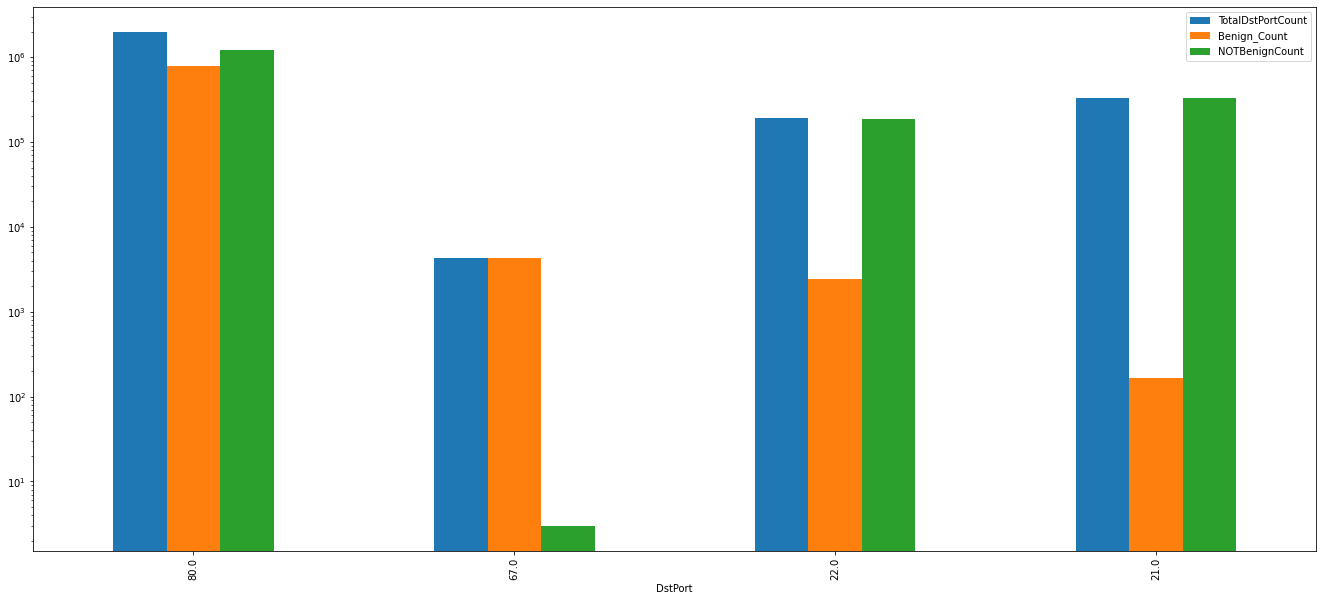

In [13]:
pandas_df = sqlDF.toPandas()
df=pandas_df.sort_values(by='DstPort',ascending=False)
df.plot(x ='DstPort', y=['TotalDstPortCount','Benign_Count','NOTBenignCount'], kind = 'bar',logy=True, figsize=(23, 10))

In [ ]:
# Student 3 name and ID Mohammed Akeel VELLATHAMBY ISMAIL and U2344592
# Query 2 [Briefly explain]:
'''
  List out the labels accordingly with the Packets difference, Total flow duration and the Total Flow Packets Time which are in
  the date between 14/02/2018 - 16/02/2018 and not having Infinity Total Flow Packets Time
  A function has been used to extract the date by splitting the Timestamp
'''
def extract_date(str):
  return str.split()[0]

spark.udf.register("extractDate", extract_date, StringType())


sqlDF2 = spark.sql("Select Label, SUM(`Fwd Pkts/s`-`Bwd Pkts/s`) as PktsDiff, SUM(`Flow Duration`), round(sum(`Flow Pkts/s`)) as FlowPacketsTime from IDSView where extractDate(Timestamp) between '14/02/2018' and '16/02/2018' group by Label HAVING FlowPacketsTime!='Infinity' and PktsDiff>0")
sqlDF2.show()

+--------------------+--------------------+------------------+---------------+
|               Label|            PktsDiff|sum(Flow Duration)|FlowPacketsTime|
+--------------------+--------------------+------------------+---------------+
|      SSH-Bruteforce|1.3962766841402054E7|   3.4394383592E10|2.9736821043E10|
|DoS attacks-Slowl...| 3.065080805150927E7|  7.91063895835E11|   7.17558461E8|
|DoS attacks-Golde...|   71815.86273486633|  4.66277648687E11|       362312.0|
|    DoS attacks-Hulk| 5.539057513865919E8|  1.39384537931E11|   5.58285098E8|
+--------------------+--------------------+------------------+---------------+



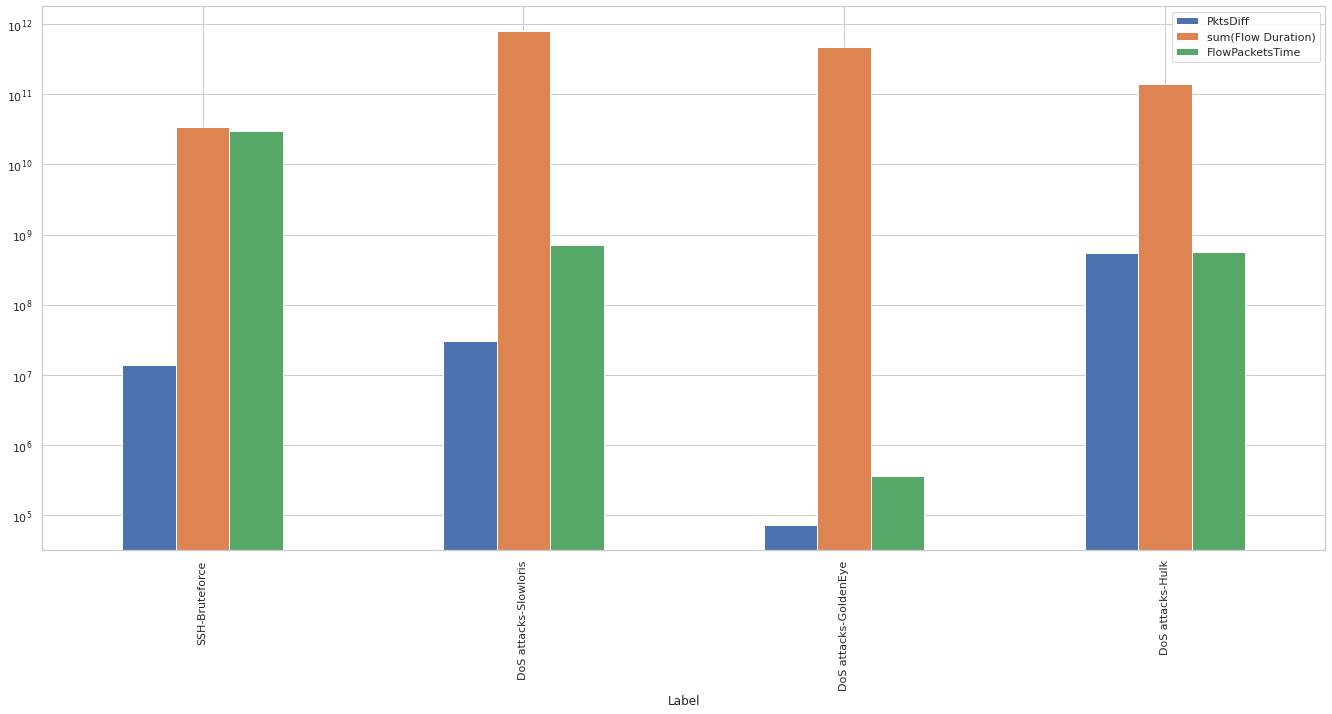

In [ ]:
pandas_df = sqlDF2.toPandas()
#df=pandas_df.sort_values(by='sum(Flow Duration)',ascending=False)
#ax = df.plot(x='DstPort', y='Benign_Count', kind='bar' ,color='blue',logy=True)
pandas_df.plot(x ='Label', y=['PktsDiff','sum(Flow Duration)','FlowPacketsTime'], kind = 'bar',logy=True, figsize=(23, 10))

In [ ]:
# Student 4 name and ID Prahalad Venukonti and U2223805
# Query 1 [Briefly explain]:
'''
Find the average and sum of Total Forward packets + Total Backward Packets (Total Packets) and Total Forward Packets Length  + Total Backward Packets Length (Total Packets Length) per each port 
and per Benign attack type and per DDos attack type
'''
sqlDF = spark.sql("select * from (select `Tot Fwd Pkts` + `Tot Bwd Pkts` as TotPkts, `TotLen Fwd Pkts` + `TotLen Bwd Pkts` as TotPktsLen, Label, `Dst Port` as Port from IDSView) PIVOT ( SUM(TotPkts) AS TotPktsSum, SUM(TotPktsLen) AS TotPktsLenSum, AVG(TotPkts) AS TotPktsAvg, AVG(TotPktsLen) AS TotPktsLenAvg FOR Label IN ('Benign', 'DDOS attack-HOIC'))")
sqlDF.show()

+-------+-----------------+--------------------+------------------+--------------------+---------------------------+------------------------------+---------------------------+------------------------------+
|   Port|Benign_TotPktsSum|Benign_TotPktsLenSum| Benign_TotPktsAvg|Benign_TotPktsLenAvg|DDOS attack-HOIC_TotPktsSum|DDOS attack-HOIC_TotPktsLenSum|DDOS attack-HOIC_TotPktsAvg|DDOS attack-HOIC_TotPktsLenAvg|
+-------+-----------------+--------------------+------------------+--------------------+---------------------------+------------------------------+---------------------------+------------------------------+
|46929.0|             10.0|                 0.0|               2.0|                 0.0|                       null|                          null|                       null|                          null|
|50575.0|            497.0|             28163.0| 2.940828402366864|   166.6449704142012|                       null|                          null|                       nu

In [ ]:
# Student 4 name and ID Prahalad Venukonti and U2223805
# Query 2 [Briefly explain]:
'''
Find the difference between the sum of flow duration for Label which is benign type and the sum of flow duration for Label which is not benign type per ports which are less than 100 and sorted by their port numbers
'''
sqlDF = spark.sql("select INT(Port), SUM(TotFlowDuration) as FlowDiff from ((select `Dst Port` as Port, SUM(`Flow Duration`) as TotFlowDuration from IDSView where Label = 'Benign' group by Port) union all (select `Dst Port` as Port, -SUM(`Flow Duration`) as TotFlowDuration from IDSView where Label != 'Benign' group by Port)) group by Port having Port < 100 order by Port asc ")
sqlDF.show()

+----+----------------+
|Port|        FlowDiff|
+----+----------------+
|   0| 3.6219080951E11|
|   5|        485975.0|
|  11|        632188.0|
|  12|        211714.0|
|  15|            20.0|
|  20|        161958.0|
|  21|   1.249376489E9|
|  22|-1.8486261981E10|
|  23| 2.0531419434E10|
|  24|        593227.0|
|  25|    1.62186986E8|
|  33|        434918.0|
|  43|        229306.0|
|  49|        208965.0|
|  53|1.70648753595E11|
|  59|        661455.0|
|  67|     6.3445625E7|
|  70|            18.0|
|  74|        577953.0|
|  79|            40.0|
+----+----------------+
only showing top 20 rows



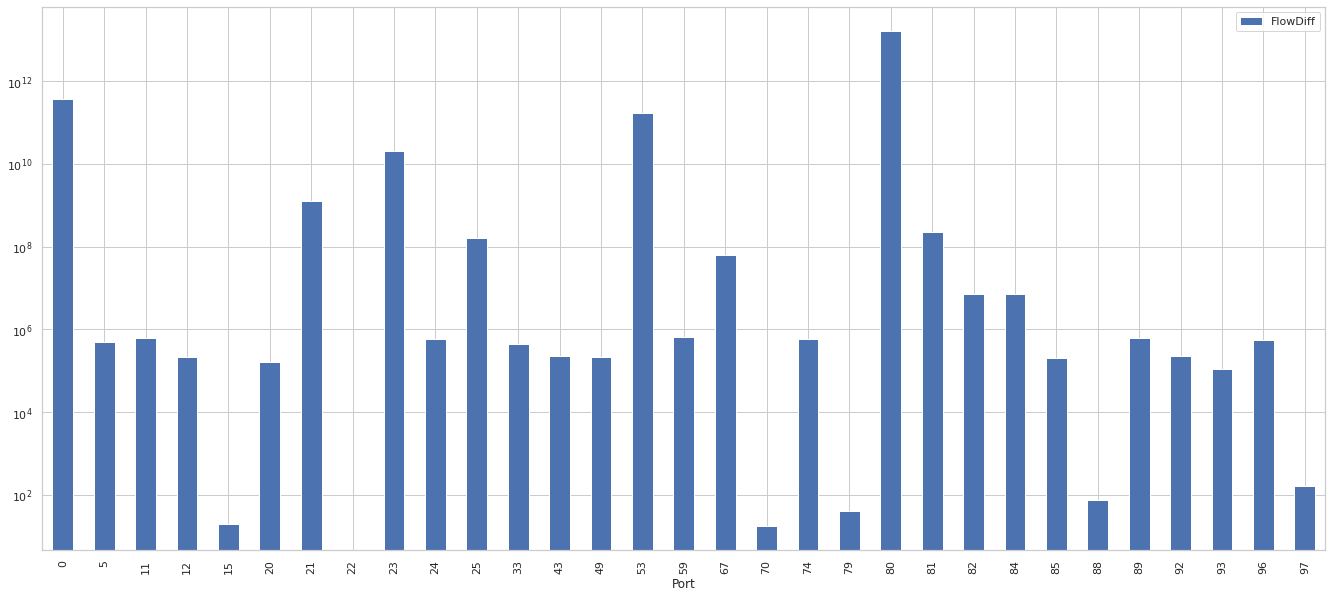

In [ ]:
sqlDF.toPandas().plot(x = 'Port', y = 'FlowDiff', kind='bar', logy=True, figsize=(23, 10))


# **Task 2 - Part1: PySpark [45 marks]**

---


In [ ]:
# Student Name:Sasindu Premarathne  and ID:U2348865
# Analytical method 1 :Skewness
#The analysis is done targeting four columns which includes details on Total forward Packets(Tot Fwd Pkts), Total Backward Packets(Tot Bwd Pkts),Total Length of Forward Packets(TotLen Fwd Pkts),Total Length of Backward Packets(TotLen Bwd Pkts).
#Skweness is identified on each distribution and  represented in tabular format.
#The values are firstly converted from String to Integer using the cast method.

In [ ]:
ID_Stat = IDS_df['`Tot Fwd Pkts`','`Tot Bwd Pkts`','`TotLen Fwd Pkts`', '`TotLen Bwd Pkts`']
ID_Stat.printSchema()

ID_Stat=ID_Stat.withColumn("Tot Fwd Pkts", col("Tot Fwd Pkts").cast("Integer"))
ID_Stat=ID_Stat.withColumn("Tot Bwd Pkts", col("Tot Bwd Pkts").cast("Integer"))
ID_Stat=ID_Stat.withColumn("TotLen Fwd Pkts", col("TotLen Fwd Pkts").cast("Integer"))
ID_Stat=ID_Stat.withColumn("TotLen Bwd Pkts", col("TotLen Bwd Pkts").cast("Integer"))
ID_Stat.printSchema()

root
 |-- Tot Fwd Pkts: float (nullable = true)
 |-- Tot Bwd Pkts: float (nullable = true)
 |-- TotLen Fwd Pkts: float (nullable = true)
 |-- TotLen Bwd Pkts: float (nullable = true)

root
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)



**Skewnwess**

In [ ]:
skewness = ID_Stat.select(skewness('`Tot Fwd Pkts`'), skewness('`Tot Bwd Pkts`'), skewness('`TotLen Fwd Pkts`'), skewness('`TotLen Fwd Pkts`'))
skewness.show()

+----------------------+----------------------+-------------------------+-------------------------+
|skewness(Tot Fwd Pkts)|skewness(Tot Bwd Pkts)|skewness(TotLen Fwd Pkts)|skewness(TotLen Fwd Pkts)|
+----------------------+----------------------+-------------------------+-------------------------+
|      70.1616111647492|    228.77071051190697|        71.62921789433908|        71.62921789433908|
+----------------------+----------------------+-------------------------+-------------------------+



In [ ]:
# Student Name:Sasindu Premarathne  and ID:U2348865
# Analytical method 2 :Correlation
#The analysis is done targeting four columns which includes details on Total forward Packets(Tot Fwd Pkts), Total Backward Packets(Tot Bwd Pkts),Total Length of Forward Packets(TotLen Fwd Pkts),Total Length of Backward Packets(TotLen Bwd Pkts).
#Correlation is identified between Tot Fwd Pkts and Tot Bwd Pkts.Also between TotLen Fwd Pkts and TotLen Bwd Pkts.
#Correlation is identified and represented in tabular format.


**Correlation**

In [ ]:
correlate1 = ID_Stat.stat.corr ('`Tot Fwd Pkts`','`Tot Bwd Pkts`')
print("correlation between `Tot Fwd Pkts`' and '`Tot Bwd Pkts` is = " , correlate1)
correlate2 = ID_Stat.stat.corr ('`TotLen Fwd Pkts`','`TotLen Bwd Pkts`')
print("correlation between `TotLen Fwd Pkts`'and '`TotLen Bwd Pkts` is = " , correlate2)

correlation between `Tot Fwd Pkts`' and '`Tot Bwd Pkts` is =  0.02771234351604217
correlation between `TotLen Fwd Pkts`'and '`TotLen Bwd Pkts` is =  0.0020629737914500254


In [ ]:
# Student Name:Sasindu Premarathne  and ID:U2348865
# Analytical method 3 : Kurtosis
#The analysis is done targeting four columns which includes details on Total forward Packets(Tot Fwd Pkts), Total Backward Packets(Tot Bwd Pkts),Total Length of Forward Packets(TotLen Fwd Pkts),Total Length of Backward Packets(TotLen Bwd Pkts).
#Kurtosis is identified and represented in tabular format.


**Kurtosis**

In [ ]:
kurtos = ID_Stat.select(kurtosis('`Tot Fwd Pkts`'), kurtosis('`Tot Bwd Pkts`'), kurtosis('`TotLen Fwd Pkts`'), kurtosis('`TotLen Fwd Pkts`'))
kurtos.show()

+----------------------+----------------------+-------------------------+-------------------------+
|kurtosis(Tot Fwd Pkts)|kurtosis(Tot Bwd Pkts)|kurtosis(TotLen Fwd Pkts)|kurtosis(TotLen Fwd Pkts)|
+----------------------+----------------------+-------------------------+-------------------------+
|    5230.6347807193615|     102006.9743515464|        5612.736778724914|        5612.736778724914|
+----------------------+----------------------+-------------------------+-------------------------+



In [ ]:
# Student 2 name and ID Koganti Tarun Chand and U2366409
# Analytical method 1: Covariance
# Covariance Formula = sum((Xi - X) * (Yi - Y)) / N 
'''
Where Xi is the first column value, Yi is the second column value
X is the mean of the first column , Y is the mean of the second column
N is the total number of records
'''

# Defining a function which will calculate the numerator of covariance which will be used as a user defined function in SQL query
def covariance_numerator(mean_x, mean_y, x, y):
  mean_x = float(mean_x)
  mean_y = float(mean_y)
  x = float(x)
  y = float(y)
  return ((x - mean_x) *  (y - mean_y))

#Registering the above function as an udf with a particular name
spark.udf.register("covariance_numerator_udf", covariance_numerator, FloatType())

# Function to calculate Covariance
def calculate_covariance(view_name, column_x, column_y):
  # Escaping spaces or any special characters
  view_name = '`' + str(view_name) + '`'
  column_x = '`' + str(column_x) + '`'
  column_y = '`' + str(column_y) + '`'
  mean_x = str(spark.sql('select avg('+ column_x + ') from ' + view_name).collect()[0][0]) # get mean of first column
  mean_y = str(spark.sql('select avg('+ column_y + ') from ' + view_name).collect()[0][0]) # get mean of second column
  covar_numerator = spark.sql('select sum(covariance_numerator_udf(' + mean_x + ', ' + mean_y + ', ' + column_x + ', ' + column_y + ')) from ' + view_name).collect()[0][0]
  covar_denominator = spark.sql('select count(*) from ' + view_name).collect()[0][0] - 1
  return (covar_numerator/covar_denominator)


In [ ]:
# Calculating the covariance between Total Forward Packets and Total Backward Packets 
tot_packets_covariance = calculate_covariance('IDSView', 'Tot Fwd Pkts', 'Tot Bwd Pkts')
# Calculating the covariance between Total Forward Packets Length and Total Backward Packets Length
tot_packets_length_covariance = calculate_covariance('IDSView', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts')

In [ ]:
print(tot_packets_covariance)

8823.262453867586


In [ ]:
# Verifying the above manually written function for covariance by using builtin function and comparing values
IDS_df.stat.cov('Tot Fwd Pkts', 'Tot Bwd Pkts')

8823.26241942485

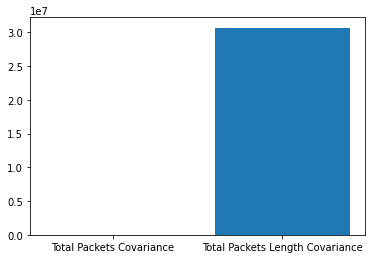

In [ ]:
#Plotting the covariances of (Total Forward Packets , Total Backward Packets) and (Total Forward Packets Length, Total Backward Packets Length)
result = dict({'Total Packets Covariance': tot_packets_covariance, 'Total Packets Length Covariance': tot_packets_length_covariance})
bar_plot(result)

In [ ]:
# Student 2 name and ID Koganti Tarun Chand and U2366409
# Analytical method 2: Range
# Function to calculate Range
def get_range(df, column_name):
  df_rdd = df.select(column_name).rdd.flatMap(lambda x:x) # Converting a single column of dataframe to rdd
  min = df_rdd.reduce(lambda a,b: a if a < b else b) # Reducing the values of the column based on less than condition
  max = df_rdd.reduce(lambda a,b: a if a > b else b) # Reducing the values of the column based on greater than condition
  return max - min

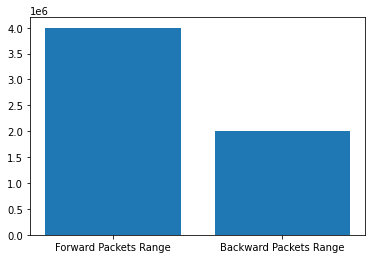

In [ ]:
# Calculating the range of Forward Packets
fwd_pkt_range = get_range(IDS_df, 'Fwd Pkts/s')

# Calculating the range of Backward Packets
bwd_pkt_range = get_range(IDS_df, 'Bwd Pkts/s')

# Plotting their results
bar_plot(dict({'Forward Packets Range': fwd_pkt_range, 'Backward Packets Range': bwd_pkt_range}))

In [ ]:
# Student 2 name and ID Koganti Tarun Chand and U2366409
# Analytical method 3: Rank

# Function to calculate rank
def get_rank(view_name, column, value):
  value = str(value)
  # Escaping special characters
  view_name = '`' + str(view_name) + '`' 
  column = '`' + str(column) + '`'
  # Sorting the values and assigning them a row number and getting the row number of the required value which will be the rank of that value
  rank = spark.sql('with temp as (SELECT distinct ' + column + ', DENSE_RANK() OVER (ORDER BY ' + column + ') AS Rank FROM ' + view_name + ' ) select Rank from temp where ' + column + '=' + value).collect()[0][0]
  return rank

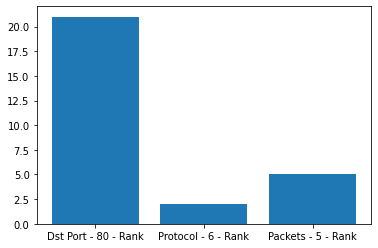

In [ ]:
# Finding the rank of HTTP Port 80 among other ports in Dst Port Column
dst_port_rank = get_rank('IDSView', 'Dst Port', 80)

# Finding the rank of Protocol 6 among other protcols in Protocol Column
protocol_rank = get_rank('IDSView', 'Protocol', 6)

# Finding the rank of Packets with total as 5 among other total packets in Tot Fwd Pkts Column
packets_rank = get_rank('IDSView', 'Tot Fwd Pkts', 5)

#Plotting the results
bar_plot(dict({'Dst Port - 80 - Rank': dst_port_rank, 'Protocol - 6 - Rank': protocol_rank, 'Packets - 5 - Rank': packets_rank}))

In [14]:
# Student 3 name and ID Mohammed Akeel VELLATHAMBY ISMAIL and U2344592
# Analytical method 1: Standard Deviation
'''
    here the mean is calculated from the function calMean and return the mean value of a column
    where in the square function the square value of mean - each value from the dataset of a particular column is returned
    IN calSTD function get the total sum of mean - value and divide it by the total number of values and get the square root value  
'''

def square_function(mean,value):
  mean= float(mean)
  value= float(value)
  return (mean-value) * (mean-value)

spark.udf.register("squareFunction", square_function, FloatType())

def calMean(columnName):
  return IDS_df.select(mean(IDS_df[columnName]).alias('mean')).collect()[0][0]
  
def calSTD(column_name):
  mean = str(calMean(column_name))
  sum = spark.sql("Select sum(squareFunction(" + mean + ",`" + column_name + "`)) from IDSView").collect()[0][0]
  count= spark.sql("Select count(`" + column_name + "`) from IDSView").collect()[0][0]
  return math.sqrt(sum/count)

std1=calSTD("Fwd Pkt Len Std")
print(std1)
std2=calSTD("Bwd Pkt Len Std")
print(std2)

140.94450259606114
186.1751848147334


In [ ]:
summary = IDS_df.select(stddev(IDS_df['Fwd Pkt Len Std']).alias('MAX(src_byte)'))

summary.show()

+------------------+
|     MAX(src_byte)|
+------------------+
|140.94451173429727|
+------------------+



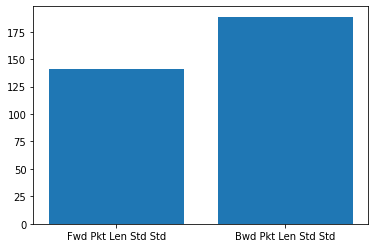

In [ ]:
bar_plot(dict({'Fwd Pkt Len Std Std': std1, 'Bwd Pkt Len Std Std': std2}))

In [ ]:
# Student 3 name and ID Mohammed Akeel VELLATHAMBY ISMAIL and U2344592
# Analytical method 2: Frequency
# List the frquency as the number of label defined in the dataset

SqlDF3 = spark.sql('select Label, count(*) as Frequency from IDSView group by Label')
SqlDF3.show()

+--------------------+---------+
|               Label|Frequency|
+--------------------+---------+
|      SSH-Bruteforce|   187589|
|              Benign|  5312835|
|      FTP-BruteForce|   193354|
|DoS attacks-Slowl...|    10990|
|DoS attacks-Golde...|    41508|
|DoS attacks-SlowH...|   139890|
|    DoS attacks-Hulk|   461912|
|DDOS attack-LOIC-UDP|     1730|
|    DDOS attack-HOIC|   686012|
|       SQL Injection|       87|
|    Brute Force -XSS|      230|
|    Brute Force -Web|      611|
|                 Bot|   286191|
+--------------------+---------+



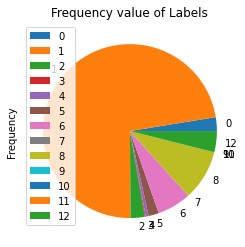

In [ ]:
pandas_df = SqlDF3.toPandas()
pandas_df.plot(title='Frequency value of Labels', x ='Label', y='Frequency', kind = 'pie')

In [ ]:
# Student 3 name and ID Mohammed Akeel VELLATHAMBY ISMAIL and U2344592
# Analytical method 3: Quantile
# get the quantiles values of the column Flow Duration

from pyspark.sql.functions import col

IDS_df=IDS_df.withColumn("`Flow Duration`", col("`Flow Duration`").cast("Float"))

quantiles = IDS_df.approxQuantile("`Flow Duration`", [0.25, 0.5, 0.75], 0)

quantiles

[637.0, 14078.0, 3019922.0]

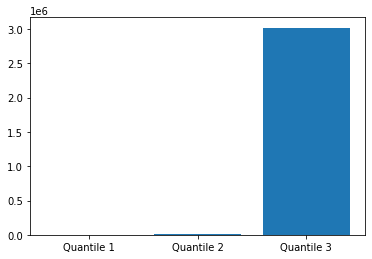

In [ ]:
result = dict({'Quantile 1': quantiles[0], 'Quantile 2': quantiles[1], 'Quantile 3': quantiles[2]})
bar_plot(result)

In [ ]:
# Student 4 name and ID Prahalad Venukonti and U2223805
# Analytical method 1: Mean
# Mean formula = SUM(elements)/N

def get_mean(df, column_name):
  df_rdd = df.select(column_name).rdd.flatMap(lambda x:x) # Converting a single column of dataframe to rdd
  sum = df_rdd.reduce(lambda a,b:a+b) # Reducing the column values by addition to get the total sum
  N = df_rdd.count() # Get total number of elements
  return sum/N # return mean which is total sum / N


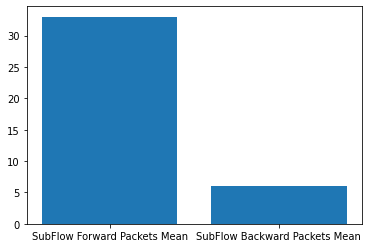

In [ ]:
# Find mean of SubFlow Forward Packets
subflow_fwd_pkts = get_mean(IDS_df, 'Subflow Fwd Pkts')

# Find mean of SubFlow Backward Packets
subflow_bwd_pkts = get_mean(IDS_df, 'Subflow Bwd Pkts')

#Plotting the results
bar_plot(dict({'SubFlow Forward Packets Mean': subflow_fwd_pkts, 'SubFlow Backward Packets Mean': subflow_bwd_pkts}))

In [ ]:
# Student 4 name and ID Prahalad Venukonti and U2223805
# Analytical method 2: Median

#Finding the median of Init Fwd Win Byts and Init Bwd Win Byts Column
median = IDS_df.select(percentile_approx(IDS_df['Init Fwd Win Byts'], 0.5), percentile_approx(IDS_df['Init Bwd Win Byts'], 0.5))
median.show()

+------------------------------------------------+------------------------------------------------+
|percentile_approx(Init Fwd Win Byts, 0.5, 10000)|percentile_approx(Init Bwd Win Byts, 0.5, 10000)|
+------------------------------------------------+------------------------------------------------+
|                                          8192.0|                                             0.0|
+------------------------------------------------+------------------------------------------------+



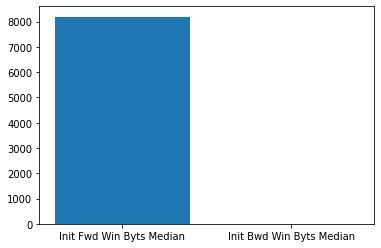

In [ ]:
res=median.collect() # Collecting the results

#Plotting the results
bar_chart = dict({'Init Fwd Win Byts Median': res[0][0], 'Init Bwd Win Byts Median': res[0][1]})
bar_plot(bar_chart)

In [ ]:
# Student 4 name and ID Prahalad Venukonti and U2223805
# Analytical method 3: Mode

# Function for getting Mode
def get_mode(view_name, column):
  view_name = '`' + str(view_name) + '`' 
  column = '`' + str(column) + '`'
  # Group by their frequency and sorting them and selecting the first element
  mode = spark.sql('select ' + column + ', count(*) as frequency from ' + view_name + ' group by ' + column + 'order by frequency desc limit 1').collect()[0][1]
  return mode

In [ ]:
# Printing the results

print('Most used Port ', get_mode('IDSView', 'Protocol'))
print('Most used Protocol ' , get_mode('IDSView', 'Protocol'))
print('Most used label ' , get_mode('IDSView', 'Label'))

Most used Port  5888994
Most used Protocol  5888994
Most used label  5312835



# **Task 2 - Part2: PySpark [15 marks]**

---


In [ ]:
# Reducing the size of data frame to speed up the training process 

# Selecting the positive records
IDS_df2 = spark.sql("select * from IDSView where Label='Benign' limit 5000")
IDS_df2.groupBy('Label').count().show()

+------+-----+
| Label|count|
+------+-----+
|Benign| 5000|
+------+-----+



In [ ]:
# Reducing the size of data frame to speed up the training process 

# Selecting the negative records
IDS_df3 = spark.sql("select * from IDSView where Label!='Benign' limit 5000")
IDS_df3.groupBy('Label').count().show()

+--------------+-----+
|         Label|count|
+--------------+-----+
|FTP-BruteForce| 5000|
+--------------+-----+



In [ ]:
# Making sure that the data used for ml contains both postive and negative cases 

IDS_df = IDS_df2.union(IDS_df3)
IDS_df.groupBy('Label').count().show()

+--------------+-----+
|         Label|count|
+--------------+-----+
|        Benign| 5000|
|FTP-BruteForce| 5000|
+--------------+-----+



In [ ]:
# Verifying the Data Frame

IDS_df.show()

+--------+--------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+---------

In [ ]:
# Feature Extraction - Selecting all the columns except Timestamp as Input Features. 

column_list = IDS_df.columns
column_list.remove('Label') # Label is removed since it is the output we want to predict
column_list.remove('Timestamp') # Removing Timestamp from Input Features
assembler = VectorAssembler(inputCols = column_list, outputCol='features') # Assembling all the feature columns to a single column named features as list
feature_data = assembler.transform(IDS_df) # Doing the transformation 
feature_data.select('features', 'Label').show(truncate=False) # Verifying the results

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|features                                                                                                                                                                                                                                                                                                                                

In [ ]:
# Scaling - Making sure that all features are on same scale so that one feature cannot dominate other feature with huge difference in values

scaler = StandardScaler().setInputCol('features').setOutputCol('Scaled_features')
data = scaler.fit(feature_data).transform(feature_data)

In [ ]:
# Selecting and verifying the data

final_data = data.select('Scaled_features', 'Label')
final_data.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Splitting the data into Train and Test Data

train, test  = final_data.randomSplit([0.8, 0.2], seed = 9164)

In [ ]:
# Verifying the Training Data

train.show()

+--------------------+------+
|     Scaled_features| Label|
+--------------------+------+
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
+--------------------+------+
only showing top 20 rows



In [ ]:
# Converting the output Column Label to numerical value before training the model.

train = train.withColumn("Label_number",
                     when(col("Label")=='Benign', 1)  # If Column is Benign then change it to 1 else 0
                     .otherwise(0))
train = train.select('Scaled_features', 'Label_number')
train.show() # Verifying the data

+--------------------+------------+
|     Scaled_features|Label_number|
+--------------------+------------+
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
+--------------------+------------+
only showing top 20 rows



In [ ]:
# Verifying the Training Data

test.show()

+--------------------+------+
|     Scaled_features| Label|
+--------------------+------+
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
|(78,[0,1,2,3,4,5,...|Benign|
+--------------------+------+
only showing top 20 rows



In [ ]:
# Converting the output Column Label to numerical value 

test = test.withColumn("Label_number",
                     when(col("Label")=='Benign', 1) # If Column is Benign then change it to 1 else 0
                     .otherwise(0))
test = test.select('Scaled_features', 'Label_number')
test.show() # Verifying the data

+--------------------+------------+
|     Scaled_features|Label_number|
+--------------------+------------+
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
|(78,[0,1,2,3,4,5,...|           1|
+--------------------+------------+
only showing top 20 rows



In [ ]:
# Student 1 name and ID Sasindu Premarathne and U2348865
# Machine Learning Technique: Factorization Machines Classifier
# What to achieve: Predict whether the Label is normal or under attack
start_time = time.time() 
fm = FMClassifier(labelCol='Label_number', featuresCol='Scaled_features')
model = fm.fit(train)
prediction_result = model.transform(test)
prediction_result.show()
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Label_number', predictionCol='prediction', metricName='accuracy')
fm_classifier_accuracy = accuracy_evaluator.evaluate(prediction_result)
fm_classifier_performance = time.time() - start_time
print('Accuracy : ', fm_classifier_accuracy)
print("--- %s sec ---" % (fm_classifier_performance))

+--------------------+------------+-------------+-----------+----------+
|     Scaled_features|Label_number|rawPrediction|probability|prediction|
+--------------------+------------+-------------+-----------+----------+
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  [NaN,NaN]|       0.0|
|(78,[0,1,2,3,4,5,...|           1|    [NaN,NaN]|  

In [ ]:
# Student 2 name and ID Koganti Tarun Chand and U2366409
# Machine Learning Technique: Decision Tree Classifier
# What to achieve: Predict whether the Label is normal or under attack

# Noting the start time
start_time = time.time()

# Training the model with Decision Tree
dec_tree = DecisionTreeClassifier(labelCol='Label_number', featuresCol='Scaled_features')
model = dec_tree.fit(train)
prediction_result = model.transform(test)
prediction_result.show()

# Calculating the accuracy of model
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Label_number', predictionCol='prediction', metricName='accuracy')
decision_tree_accuracy = accuracy_evaluator.evaluate(prediction_result)
decision_tree_performance = time.time() - start_time

# Printing the results
print('Accuracy : ', decision_tree_accuracy)
print("--- %s sec ---" % (decision_tree_performance))

+--------------------+------------+-------------+-----------+----------+
|     Scaled_features|Label_number|rawPrediction|probability|prediction|
+--------------------+------------+-------------+-----------+----------+
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1| [0.0,4006.0]|  

In [ ]:
# Student 3 name and ID Mohammed Akeel VELLATHAMBY ISMAIL and U2344592
# Machine Learning Technique: Random Forest Classifier
# What to achieve: Predict whether the Label is normal or under attack
start_time = time.time() 
rf = RandomForestClassifier(labelCol='Label_number', featuresCol='Scaled_features', numTrees=10)
model = rf.fit(train)
prediction_result = model.transform(test)
prediction_result.show()
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Label_number', predictionCol='prediction', metricName='accuracy')
random_forest_accuracy = accuracy_evaluator.evaluate(prediction_result)
random_forest_performance = time.time() - start_time
print('Accuracy : ', random_forest_accuracy)
print("--- %s sec ---" % (random_forest_performance))

+--------------------+------------+-------------+-----------+----------+
|     Scaled_features|Label_number|rawPrediction|probability|prediction|
+--------------------+------------+-------------+-----------+----------+
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  [0.0,1.0]|       1.0|
|(78,[0,1,2,3,4,5,...|           1|   [0.0,10.0]|  

In [ ]:
# Student 4 name and ID Prahalad Venukonti and U2223805
# Machine Learning Technique: Gradient Boost Classifier
# What to achieve: Predict whether the Label is normal or under attack
start_time = time.time() 
gbt = GBTClassifier(labelCol='Label_number', featuresCol='Scaled_features', maxIter=10)
model = gbt.fit(train)
prediction_result = model.transform(test)
prediction_result.show()
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol='Label_number', predictionCol='prediction', metricName='accuracy')
gbt_classifier_accuracy = accuracy_evaluator.evaluate(prediction_result)
gbt_classifier_performance = time.time() - start_time
print('Accuracy : ', gbt_classifier_accuracy)
print("--- %s sec ---" % (gbt_classifier_performance))

+--------------------+------------+--------------------+--------------------+----------+
|     Scaled_features|Label_number|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...|           1|[-1.3259026792203...|[0.06587782434721...|       1.0|
|(78,[0,1,2,3,4,5,...

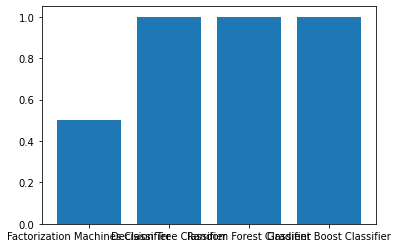

In [ ]:
# Accuracy comparison for the above classification algorithms used

accuracy_result = dict({'Factorization Machines Classifier' : fm_classifier_accuracy, 'Decision Tree Classifier': decision_tree_accuracy, 
                        'Random Forest Classifier': random_forest_accuracy, 'Gradient Boost Classifier': gbt_classifier_accuracy})

# Plotting the results
bar_plot(accuracy_result)

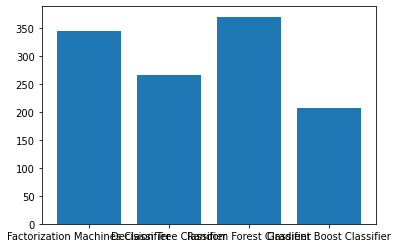

In [ ]:
# Performance comparison for the above classification algorithms used

performance_result = dict({'Factorization Machines Classifier' : fm_classifier_performance, 'Decision Tree Classifier': decision_tree_performance, 
                        'Random Forest Classifier': random_forest_performance, 'Gradient Boost Classifier': gbt_classifier_performance})

# Plotting the results
bar_plot(performance_result)

# **Convert ipynb to HTML for Turnitin submission [10 marks]**

---



In [ ]:
# install nbconvert
#!pip3 install nbconvert


# convert ipynb to html
# file name: "Your_Group_ID_CN7031.ipynb
!pip3 install nbconvert
!jupyter nbconvert --to html /content/aggregation_v2.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook /content/aggregation_v2.ipynb to html
[NbConvertApp] Writing 941559 bytes to /content/aggregation_v2.html
